In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_tests5

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y

In [3]:
def gen_data(nobs=1000, a=0.25, num_params=4):
    x = np.random.normal(scale=1., size=(nobs,num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x.sum(axis=1) + e
    return y,x,nobs

In [4]:
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    model1_deriv = OLS_loglike(yn,sm.add_constant(xn))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    return ll1,grad1,hess1,params1


def setup_test(yn,xn):
    lls = []
    grads = []
    hesss = []
    params = []                
    for i in range(xn.shape[1]):
        ll,grad,hess,param = setup_model(yn,xn[:,i])
        lls.append(ll)
        grads.append(grad)
        hesss.append(hess)
        params.append(param)
    
    #determine 1 and 2
    lls_sum = np.array(lls).sum(axis=1)
    lls_sorted = lls_sum.copy()
    lls_sorted.sort()
    ind1,ind2 = lls_sorted[-2:]
    ind1 = (lls_sum == ind1).argmax()
    ind2 = (lls_sum == ind2).argmax()
    #np.random.seed()
    #coin_flip = np.random.randint(0, 2)
    #if coin_flip > 0:
    #    ind_replace  =ind1
    #    ind1 = ind2
    #    ind2 = ind_replace
    
    return lls[ind1],grads[ind1],hesss[ind1],params[ind1], lls[ind2],grads[ind2],hesss[ind2],params[ind2]

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_test(yn,xn)

In [5]:
def plot_true2(gen_data,setup_test,trials=500):
    llr_stats=[]

    for i in range(trials):
        np.random.seed()
        ys,xs,nobs = gen_data()
        ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_test(ys,xs)
        
        ##Classical test
        V = vuong_tests5.compute_eigen2(ll1,grad1,hess1,params1,ll2, grad2,hess2,params2)
        llr = (ll1 - ll2).sum() +V.sum()/(2)
        omega2 = (ll1 - ll2).var() 
        nomega = np.clip( (np.sqrt(omega2*nobs)), .1,10000 )
        llr_stats.append(llr/nomega)
    standard_normal = np.random.normal(loc=0.0, scale=1.0, size=1000)
    plt.hist(llr_stats, density=True,bins=15, label="LLR",alpha=.60)
    plt.hist(standard_normal, density=True,bins=15, label="Normal",alpha=.60)
    plt.legend()
    plt.show()
    return llr_stats




# K = 4

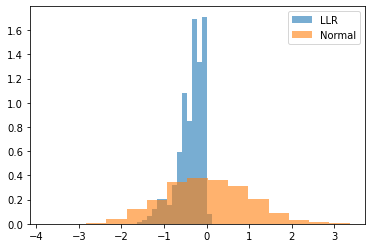

In [6]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

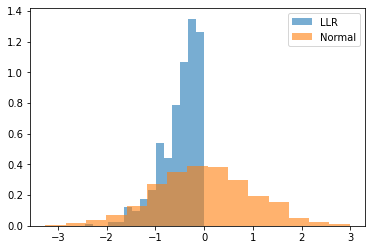

In [7]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

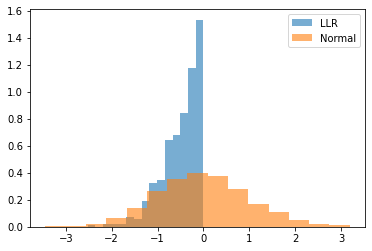

In [8]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

# K = 9

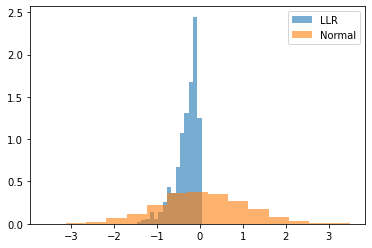

In [9]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

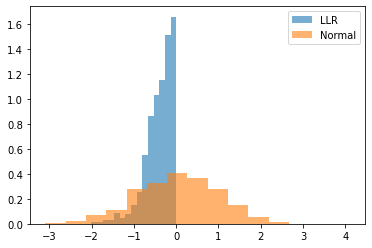

In [10]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

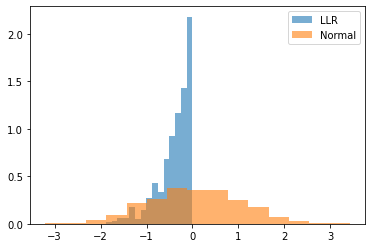

In [11]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

# K = 19

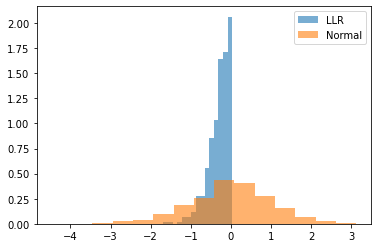

In [12]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)

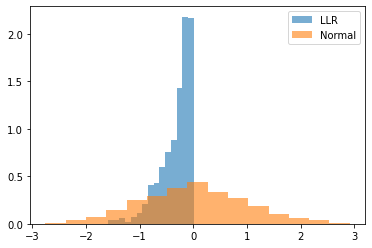

In [13]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)

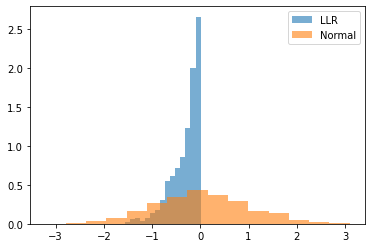

In [14]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)